In [1]:
import cv2
import os
import numpy as np
import math
import json
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Activation, Dropout
from keras.layers.pooling import GlobalAveragePooling1D, GlobalAveragePooling2D
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import Nadam, SGD
from keras.utils import to_categorical, plot_model
from keras.models import load_model, Sequential
from keras.layers.core import Dense, Flatten
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


## Use Labled Testing Dataset

In [2]:
test_data = np.load('final_test_data.npy')
test_label = np.load('final_test_label.npy')
test_name_label = np.load('final_test_name_label.npy')

In [3]:
def sample_frames(dataset, interval=5):
    """
    Sample the video frame arrays by a given interval so that we can shrink the data scale 
    """
    dataset_tmp = []
    for video in dataset:
        dataset_tmp.append(video[::interval])

    return np.array(dataset_tmp)

In [4]:
test_data = sample_frames(test_data)
test_label = test_label.astype('float32')

In [5]:
best_model = "vgg16_lstm_model_dropout_10.h5"
model = load_model(best_model)

In [6]:
score, acc = model.evaluate(test_data, test_label, batch_size=5)

12/12 [==============================] - 22s 2s/step


In [7]:
score, acc

(0.7120974014202753, 0.5833333134651184)

## Use Cropped Testing Dataset

In [8]:
test_data_cropped = np.load('final_test_data_cropped.npy')
test_label_cropped = np.load('final_test_label_cropped.npy')
test_name_label_cropped = np.load('final_test_name_label_cropped.npy')

In [9]:
test_data_cropped = sample_frames(test_data_cropped)
test_label_cropped = test_label_cropped.astype('float32')

In [10]:
score, acc = model.evaluate(test_data_cropped, test_label_cropped, batch_size=5)

12/12 [==============================] - 3s 256ms/step


In [11]:
score, acc

(0.7397022992372513, 0.4166666567325592)

## Output Time Label

In [14]:
prediction_label = model.predict(test_data, batch_size=5)

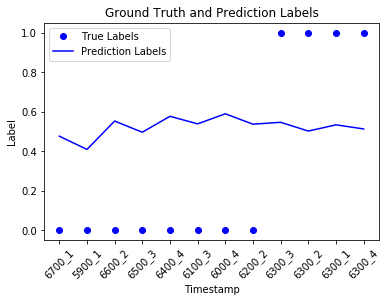

In [15]:
plt.plot(test_name_label, test_label, 'bo', label='True Labels')
plt.plot(test_name_label, prediction_label, 'b', label='Prediction Labels')
plt.title('Ground Truth and Prediction Labels')
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.ylabel('Label')
plt.legend()
plt.show()

In [20]:
threshold = 0.5

class_prediction_label = np.array([1 if prob > 0.5 else 0 for prob in prediction_label])

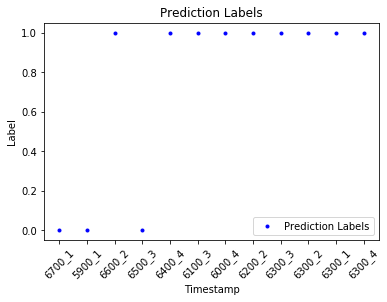

In [22]:
plt.plot(test_name_label, class_prediction_label, 'b.', label='Prediction Labels')
plt.title('Prediction Labels')
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.ylabel('Label')
plt.legend()
plt.show()

The accuracy is only 7/12 = 0.58 which is only a little above 0.5

## Import to JSON File

In [23]:
data = []
for i in range(len(test_data)):
    data.append([str(test_name_label[i]), str(prediction_label[i][0])])

In [24]:
# dump to file system
with open('timeLabel.json', 'w', encoding='utf-8') as f:
    json.dump({'slip': data}, f, ensure_ascii=False, indent=4)